## Intelligent Systems - HW1
### Soroush Mesforush Mashhad
#### SID: 810198472

### Question 1


## Part A :
Has been included in the report file

## Part B : Gradient Descent

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
import os

To have better discipline in coding, we shall split the program into different functions.

In [2]:
def read_data(filename):
    if filename == 'train.csv':
        data = pd.read_csv('train.csv')
    else:
        data = pd.read_csv('test.csv')
    labels = data['label']
    data = data.drop('label',axis = 'columns').to_numpy()
    cleaneddata = data[(labels == 7)|(labels ==2),:]
    cleaneddatatrain = cleaneddata[801:8578,:]
    cleaneddatatest= cleaneddata[0:800,:]
    print(np.shape(cleaneddata))
    labels = labels[(labels == 7)|(labels ==2)].to_numpy()
    labels = np.array([1 if item == 7 else item for item in labels])
    labels = np.array([-1 if item == 2 else item for item in labels])
    print(np.shape(labels))
    labelstrain = labels[801:8578]
    labelstest= labels[0:800]
    print(len(cleaneddata))
    cleaneddata = cleaneddata/np.max(cleaneddata)
    cleaneddatatrain = cleaneddatatrain/np.max(cleaneddatatrain)
    cleaneddatatest = cleaneddatatest/np.max(cleaneddatatest)
    return cleaneddatatrain,cleaneddatatest, labelstrain, labelstest

In [3]:
def Miu (x,y,w,b):
    Miu = 1/(1+np.exp(-y*(b+np.dot(x,w))))
    return Miu

In [4]:
def Gradient (x,y,w,b):
    #x =train_data, y = train_labels
    Gradientb = 0
    GradientW = np.zeros(x.shape[1])
    for i in range(x.shape[0]):
        Gradientb = Gradientb + y[i]*(Miu(x[i],y[i],w,b)-1)
        GradientW= GradientW + y[i]*x[i]*(Miu(x[i],y[i],w,b)-1)
    Gradientb = 1/x.shape[0] * Gradientb
    GradientW = 1/x.shape[0] * GradientW
    return Gradientb , GradientW            

In [5]:
def GradientSGD (x,y,w,b,batch,n_iter):
    GradientW = -x*y*(1 - Miu(x,y,w,b))
    Gradientb  = -y*(1 - Miu(x,y,w,b))
    return Gradientb , GradientW            

In [6]:
def Jfunc(x,y,w,b):
    J = 0
    for j in range(x.shape[0]):
        T = np.log(1+np.exp(-y[j]*(b+np.dot(x[j],w))))
        J = J + T
    J = J/x.shape[0]
    return J

In [7]:
def Learning(x,y,alpha,n_iter):
    w = np.zeros(x.shape[1])
    J=[]
    b = 0
    for k in range(n_iter):
        L = Jfunc(x,y,w,b)
        J.append(L)
        Gradb , Gradw = Gradient(x,y,w,b)
        b = b - alpha*Gradb
        w = w - alpha*Gradw
    return w , b , J

In [8]:
def LearningSGD(x,y,alpha,n_iter,batch):
    w = np.zeros(x.shape[1])
    J=[]
    b = 0
    counter = 0
    if batch==1:
        print(np.shape(x))
        print(np.shape(y))
        while counter<n_iter:
            L = Jfunc(x,y,w,b)
            J.append(L)
            for k in range(n_iter):
                Gradb , Gradw = GradientSGD(x[k],y[k],w,b,batch,n_iter)
                b = b - alpha*Gradb
                w = w - alpha*Gradw
            counter +=1
    else:
        randomchoosing = np.random.randint(0, len(x), batch)
        xstoch = x[randomchoosing]
        ystoch = y[randomchoosing]
        for i in range(n_iter):
                L = Jfunc(x,y,w,b)
                J.append(L)
                Gradb , Gradw = Gradient(x,y,w,b)
                b = b - alpha*Gradb
                w = w - alpha*Gradw
    return w , b , J

In [9]:
def our_pred(w,b,x):
    y_pred = b + np.dot(w,x)
    if y_pred<=0:
        return -1
    else:
        return 1

In [10]:
def Accuracy_Cal_Percent(y_pred,y):
    Acc_Arr = np.zeros(len(y))
    Acc_Arr[y==y_pred] = 1
    Acc_Percent = 100*sum(Acc_Arr)/len(y)
    return Acc_Percent

After defining the needed functions, we shall go on to plot the needed grids.

In [11]:
file_names = os.listdir('Dataset')
#print(file_names[1])
train_data,test_data, train_labels , test_labels = read_data(file_names[1])
#print(np.shape(train_data))
#print(np.shape(test_data))
#print(np.shape(train_labels))
#print(np.shape(test_labels))

(8578, 784)
(8578,)
8578


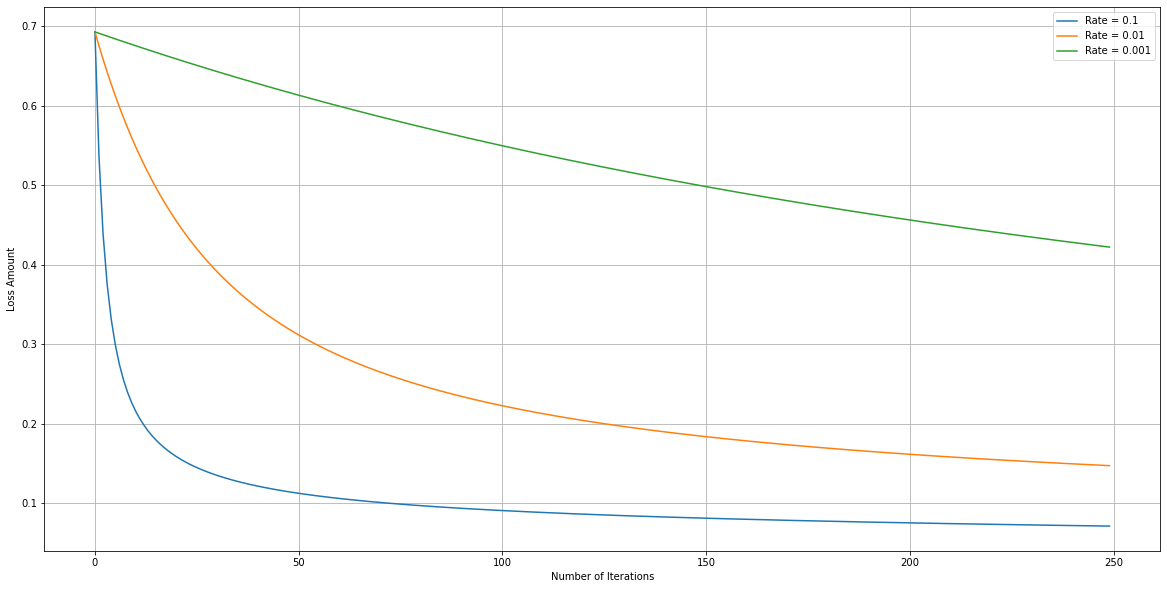

In [12]:
xtrain = train_data
ytrain = train_labels
w1t1,b1t1,J1t1 = Learning(xtrain,ytrain,0.1,250)
w2t1,b2t1,J2t1 = Learning(xtrain,ytrain,0.01,250)
w3t1,b3t1,J3t1 = Learning(xtrain,ytrain,0.001,250)
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(range(250),J1t1,label='Rate = 0.1')
ax.plot(range(250),J2t1,label='Rate = 0.01')
ax.plot(range(250),J3t1,label='Rate = 0.001')
ax.set_ylabel("Loss Amount")
ax.set_xlabel("Number of Iterations")
ax.grid(True)
ax.legend()
plt.show()

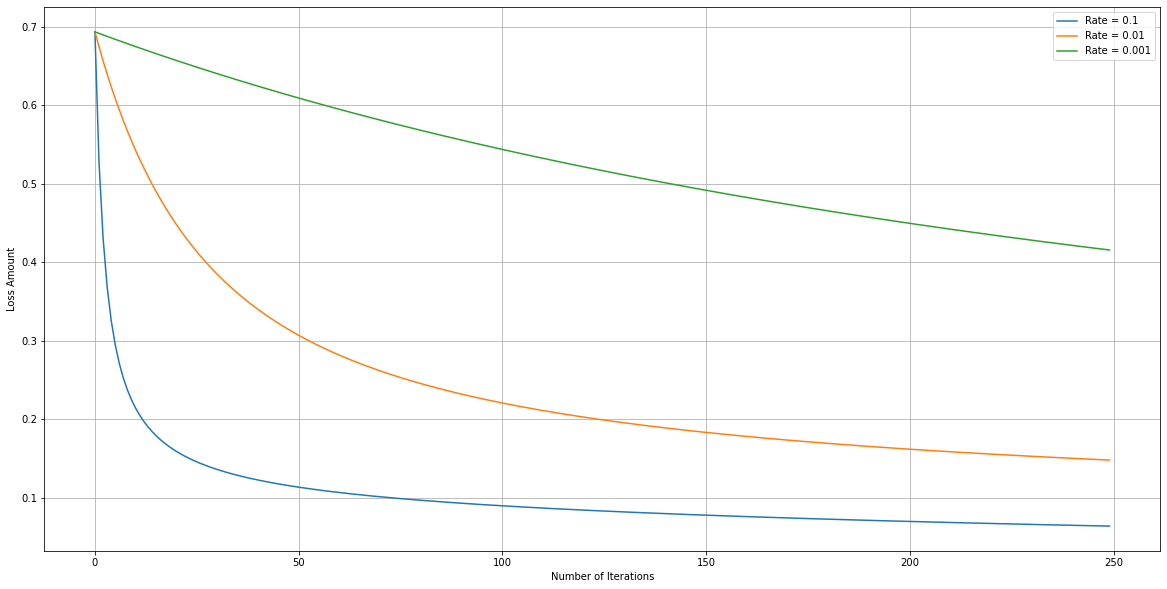

In [13]:
xtest = test_data
ytest = test_labels
w1te1,b1te1,J1te1 = Learning(xtest,ytest,0.1,250)
w2te1,b2te1,J2te1 = Learning(xtest,ytest,0.01,250)
w3te1,b3te1,J3te1 = Learning(xtest,ytest,0.001,250)
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(range(250),J1te1,label='Rate = 0.1')
ax.plot(range(250),J2te1,label='Rate = 0.01')
ax.plot(range(250),J3te1,label='Rate = 0.001')
ax.set_ylabel("Loss Amount")
ax.set_xlabel("Number of Iterations")
ax.grid(True)
ax.legend()
plt.show()

## Part C : Accuracy

Now we go on to calculate the accuracy percentages.

In [14]:
y_pred1 = []
y_pred2 = []
y_pred3 = []
i = 0
while i<xtrain.shape[0]:
    y_pred1.append(our_pred(w1t1,b1t1,xtrain[i]))
    y_pred2.append(our_pred(w2t1,b2t1,xtrain[i]))
    y_pred3.append(our_pred(w3t1,b3t1,xtrain[i]))
    i = i +1
y_pred1Arr = np.array(y_pred1)
y_pred2Arr = np.array(y_pred2)
y_pred3Arr = np.array(y_pred3)
print('Accuracy of 1st, 2nd and 3rd state is : ')
print(Accuracy_Cal_Percent(y_pred1Arr,ytrain),Accuracy_Cal_Percent(y_pred2Arr,ytrain),Accuracy_Cal_Percent(y_pred3Arr,ytrain))

Accuracy of 1st, 2nd and 3rd state is : 
97.92979297929793 96.7982512536968 96.2067635334962


In [15]:
y_pred1 = []
y_pred2 = []
y_pred3 = []
i = 0
while i<xtest.shape[0]:
    y_pred1.append(our_pred(w1te1,b1te1,xtest[i]))
    y_pred2.append(our_pred(w2te1,b2te1,xtest[i]))
    y_pred3.append(our_pred(w3te1,b3te1,xtest[i]))
    i = i +1
y_pred1Arr = np.array(y_pred1)
y_pred2Arr = np.array(y_pred2)
y_pred3Arr = np.array(y_pred3)
print('Accuracy of 1st, 2nd and 3rd state is : ')
print(Accuracy_Cal_Percent(y_pred1Arr,ytest),Accuracy_Cal_Percent(y_pred2Arr,ytest),Accuracy_Cal_Percent(y_pred3Arr,ytest))

Accuracy of 1st, 2nd and 3rd state is : 
98.25 96.5 95.75


## Part D : Stochastic Gradient Descent

(7777, 784)
(7777,)
(7777, 784)
(7777,)
(7777, 784)
(7777,)
(7777, 784)
(7777,)


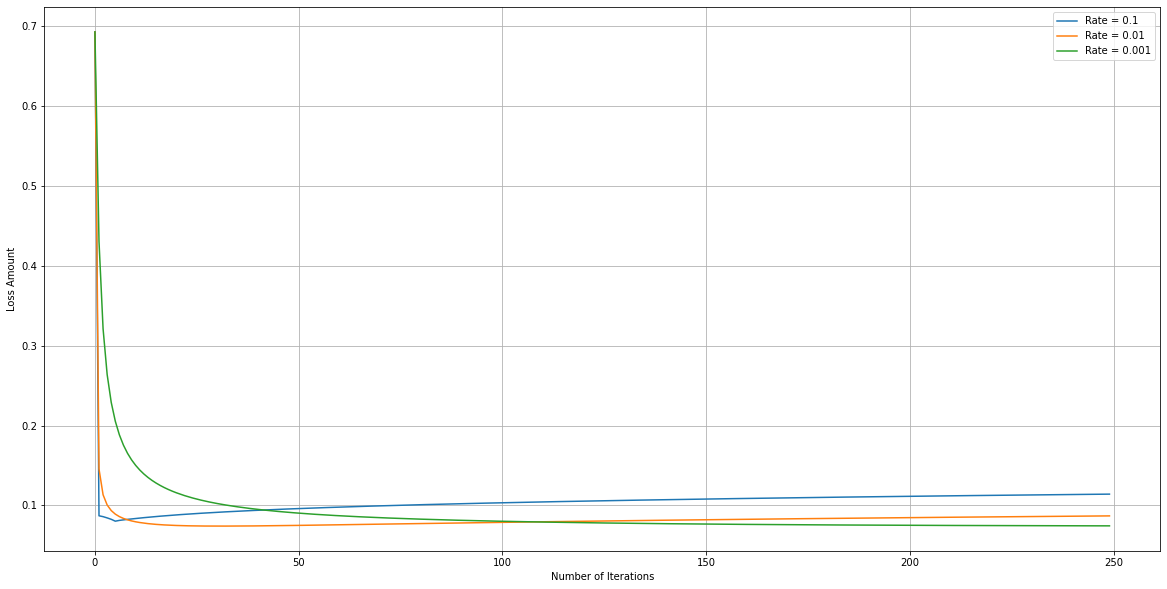

In [16]:
#Batch = 1
x = train_data
y = train_labels
print(np.shape(x))
print(np.shape(y))
w1t2,b1t2,J1t2 = LearningSGD(x,y,0.1,250,1)
w2t2,b2t2,J2t2 = LearningSGD(x,y,0.01,250,1)
w3t2,b3t2,J3t2 = LearningSGD(x,y,0.001,250,1)
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(range(250),J1t2,label='Rate = 0.1')
ax.plot(range(250),J2t2,label='Rate = 0.01')
ax.plot(range(250),J3t2,label='Rate = 0.001')
ax.set_ylabel("Loss Amount")
ax.set_xlabel("Number of Iterations")
ax.grid(True)
ax.legend()
plt.show()

(7777, 784)
(800, 784)
(800,)
(800, 784)
(800,)
(800, 784)
(800,)


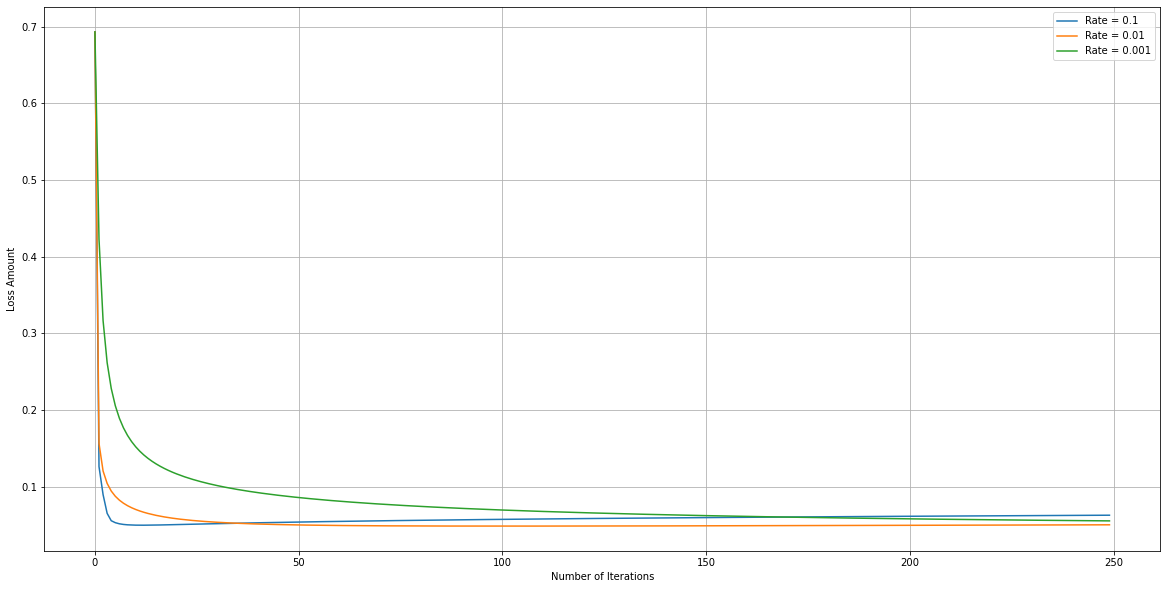

In [17]:
#Batch =1
x = test_data
y = test_labels
print(np.shape(train_data))
w1te2,b1te2,J1te2 = LearningSGD(x,y,0.1,250,1)
w2te2,b2te2,J2te2 = LearningSGD(x,y,0.01,250,1)
w3te2,b3te2,J3te2 = LearningSGD(x,y,0.001,250,1)
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(range(250),J1te2,label='Rate = 0.1')
ax.plot(range(250),J2te2,label='Rate = 0.01')
ax.plot(range(250),J3te2,label='Rate = 0.001')
ax.set_ylabel("Loss Amount")
ax.set_xlabel("Number of Iterations")
ax.grid(True)
ax.legend()
plt.show()

In [18]:
y_pred1 = []
y_pred2 = []
y_pred3 = []
i = 0
while i<xtrain.shape[0]:
    y_pred1.append(our_pred(w1t2,b1t2,xtrain[i]))
    y_pred2.append(our_pred(w2t2,b2t2,xtrain[i]))
    y_pred3.append(our_pred(w3t2,b3t2,xtrain[i]))
    i = i +1
y_pred1Arr = np.array(y_pred1)
y_pred2Arr = np.array(y_pred2)
y_pred3Arr = np.array(y_pred3)
print('Accuracy of 1st, 2nd and 3rd state is : ')
print(Accuracy_Cal_Percent(y_pred1Arr,ytrain),Accuracy_Cal_Percent(y_pred2Arr,ytrain),Accuracy_Cal_Percent(y_pred3Arr,ytrain))

Accuracy of 1st, 2nd and 3rd state is : 
97.27401311559727 97.27401311559727 97.35116368779735


In [19]:
y_pred1 = []
y_pred2 = []
y_pred3 = []
i = 0
while i<xtest.shape[0]:
    y_pred1.append(our_pred(w1te2,b1te2,xtest[i]))
    y_pred2.append(our_pred(w2te2,b2te2,xtest[i]))
    y_pred3.append(our_pred(w3te2,b3te2,xtest[i]))
    i = i +1
y_pred1Arr = np.array(y_pred1)
y_pred2Arr = np.array(y_pred2)
y_pred3Arr = np.array(y_pred3)
print('Accuracy of 1st, 2nd and 3rd state is : ')
print(Accuracy_Cal_Percent(y_pred1Arr,ytest),Accuracy_Cal_Percent(y_pred2Arr,ytest),Accuracy_Cal_Percent(y_pred3Arr,ytest))

Accuracy of 1st, 2nd and 3rd state is : 
98.125 98.375 98.5


(7777, 784)
(7777,)


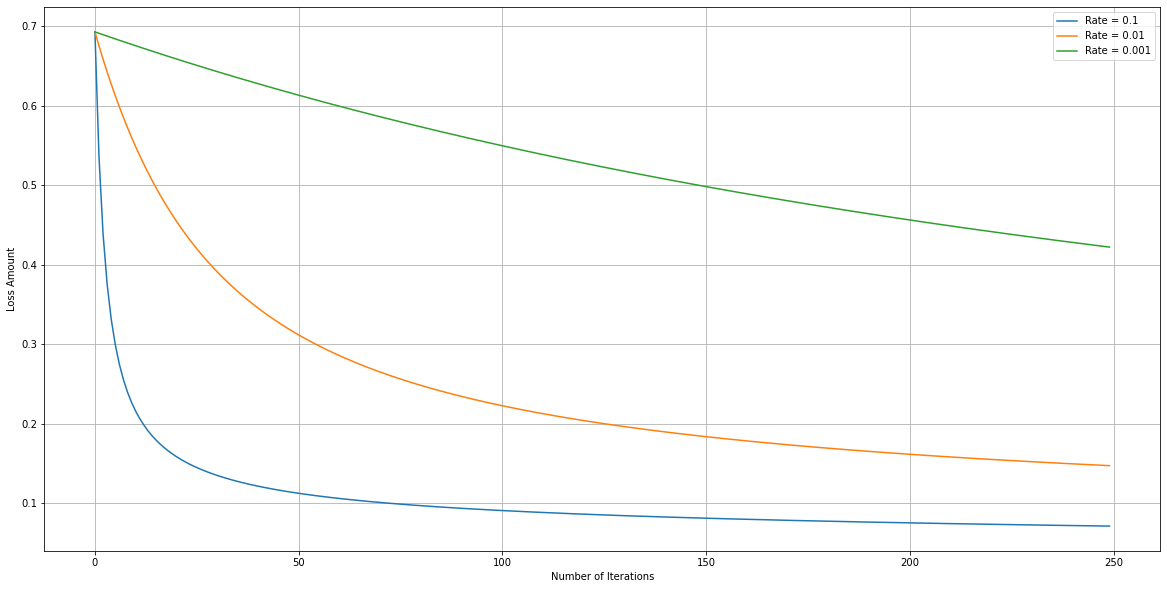

In [20]:
#Batch = 100
x = train_data
y = train_labels
print(np.shape(x))
print(np.shape(y))
w1t3,b1t3,J1t3 = LearningSGD(x,y,0.1,250,100)
w2t3,b2t3,J2t3 = LearningSGD(x,y,0.01,250,100)
w3t3,b3t3,J3t3 = LearningSGD(x,y,0.001,250,100)
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(range(250),J1t3,label='Rate = 0.1')
ax.plot(range(250),J2t3,label='Rate = 0.01')
ax.plot(range(250),J3t3,label='Rate = 0.001')
ax.set_ylabel("Loss Amount")
ax.set_xlabel("Number of Iterations")
ax.grid(True)
ax.legend()
plt.show()

(7777, 784)


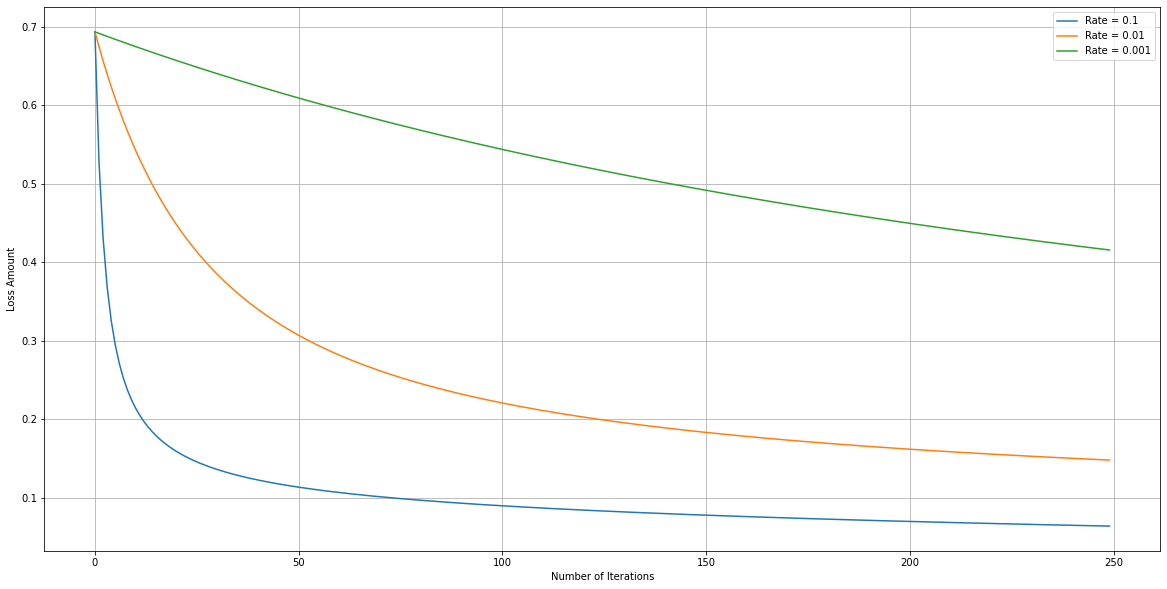

In [21]:
#Batch =100
x = test_data
y = test_labels
print(np.shape(train_data))
w1te3,b1te3,J1te3 = LearningSGD(x,y,0.1,250,100)
w2te3,b2te3,J2te3 = LearningSGD(x,y,0.01,250,100)
w3te3,b3te3,J3te3 = LearningSGD(x,y,0.001,250,100)
plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(range(250),J1te3,label='Rate = 0.1')
ax.plot(range(250),J2te3,label='Rate = 0.01')
ax.plot(range(250),J3te3,label='Rate = 0.001')
ax.set_ylabel("Loss Amount")
ax.set_xlabel("Number of Iterations")
ax.grid(True)
ax.legend()
plt.show()

Now we calculate the Accuracies 

In [22]:
y_pred1 = []
y_pred2 = []
y_pred3 = []
i = 0
while i<xtrain.shape[0]:
    y_pred1.append(our_pred(w1t3,b1t3,xtrain[i]))
    y_pred2.append(our_pred(w2t3,b2t3,xtrain[i]))
    y_pred3.append(our_pred(w3t3,b3t3,xtrain[i]))
    i = i +1
y_pred1Arr = np.array(y_pred1)
y_pred2Arr = np.array(y_pred2)
y_pred3Arr = np.array(y_pred3)
print('Accuracy of 1st, 2nd and 3rd state is : ')
print(Accuracy_Cal_Percent(y_pred1Arr,ytrain),Accuracy_Cal_Percent(y_pred2Arr,ytrain),Accuracy_Cal_Percent(y_pred3Arr,ytrain))

Accuracy of 1st, 2nd and 3rd state is : 
97.92979297929793 96.7982512536968 96.2067635334962


In [23]:
y_pred1 = []
y_pred2 = []
y_pred3 = []
i = 0
while i<xtest.shape[0]:
    y_pred1.append(our_pred(w1te3,b1te3,xtest[i]))
    y_pred2.append(our_pred(w2te3,b2te3,xtest[i]))
    y_pred3.append(our_pred(w3te3,b3te3,xtest[i]))
    i = i +1
y_pred1Arr = np.array(y_pred1)
y_pred2Arr = np.array(y_pred2)
y_pred3Arr = np.array(y_pred3)
print('Accuracy of 1st, 2nd and 3rd state is : ')
print(Accuracy_Cal_Percent(y_pred1Arr,ytest),Accuracy_Cal_Percent(y_pred2Arr,ytest),Accuracy_Cal_Percent(y_pred3Arr,ytest))

Accuracy of 1st, 2nd and 3rd state is : 
98.25 96.5 95.75
